#### Visualization for EUMETSAT/MSG Data

In [2]:
import autoroot

In [3]:
import os
import ast
import eumdac
import datetime
import shutil
import pyproj
import rioxarray
import rasterio
import xarray as xr

from pyproj import CRS

In [4]:
%load_ext autoreload
%autoreload 2

Unfortunately, .nat files are a bit complicated to read/load. One of the best packages is satpy, which then allows loading the files using xarray.

In [28]:
from satpy import Scene
scn = Scene(reader="seviri_l1b_native", filenames=['MSG4-SEVI-MSG15-0100-NA-20211110081242.766000000Z-NA.nat'])

In [29]:
# MSG data contains 12 channels, including the high-resolution visible (HRV) channel.
datasets = scn.available_dataset_names()
datasets

['HRV',
 'IR_016',
 'IR_039',
 'IR_087',
 'IR_097',
 'IR_108',
 'IR_120',
 'IR_134',
 'VIS006',
 'VIS008',
 'WV_062',
 'WV_073']

In order to convert the scn object to xarray, each dataset needs to be loaded.

In [51]:
scn.load(datasets[1:], generate=False, calibration='radiance') # The calibration is set to 'radiance' to convert the data to radiance units
# Note: The HRV channel comes in 1 km resolution, while the other channels are 3 km resolution.
# Because of the size mismatch, the HRV channel would either need to be downscaled,
# or it needs to the loaded separetely to the other channels


In [33]:
ds = scn.to_xarray()

In [48]:
ds.WV_073

<xarray.DataArray 'WV_073' (y: 3712, x: 3712)>
dask.array<clip, shape=(3712, 3712), dtype=float32, chunksize=(928, 3712), chunktype=numpy.ndarray>
Coordinates: (12/15)
    IR_016_acq_time  (y) datetime64[ns] NaT NaT NaT NaT NaT ... NaT NaT NaT NaT
  * y                (y) float64 -5.566e+06 -5.563e+06 ... 5.566e+06 5.569e+06
  * x                (x) float64 5.566e+06 5.563e+06 ... -5.566e+06 -5.569e+06
    longitude        (y, x) float64 dask.array<chunksize=(928, 3712), meta=np.ndarray>
    latitude         (y, x) float64 dask.array<chunksize=(928, 3712), meta=np.ndarray>
    IR_039_acq_time  (y) datetime64[ns] NaT NaT NaT NaT NaT ... NaT NaT NaT NaT
    ...               ...
    IR_120_acq_time  (y) datetime64[ns] NaT NaT NaT NaT NaT ... NaT NaT NaT NaT
    IR_134_acq_time  (y) datetime64[ns] NaT NaT NaT NaT NaT ... NaT NaT NaT NaT
    VIS006_acq_time  (y) datetime64[ns] NaT NaT NaT NaT NaT ... NaT NaT NaT NaT
    VIS008_acq_time  (y) datetime64[ns] NaT NaT NaT NaT NaT ... NaT NaT NaT NaT
    WV_062_acq_time  (y) datetime64[ns] NaT NaT NaT NaT NaT ... NaT NaT NaT NaT
    WV_073_acq_time  (y) datetime64[ns] NaT NaT NaT NaT NaT ... NaT NaT NaT NaT
Attributes: (12/15)
    calibration:              radiance
    end_time:                 2021-11-10 08:15:00
    georef_offset_corrected:  true
    grid_mapping:             msg_seviri_fes_3km
    modifiers:                []
    orbital_parameters:       {"projection_longitude": 0.0, "projection_latit...
    ...                       ...
    sensor:                   seviri
    standard_name:            toa_outgoing_radiance_per_unit_wavenumber
    start_time:               2021-11-10 08:00:00
    time_parameters:          {"nominal_start_time": "2021-11-10 08:00:00", "...
    units:                    mW m-2 sr-1 (cm-1)-1
    wavelength:               7.35 µm (6.85-7.85 µm)

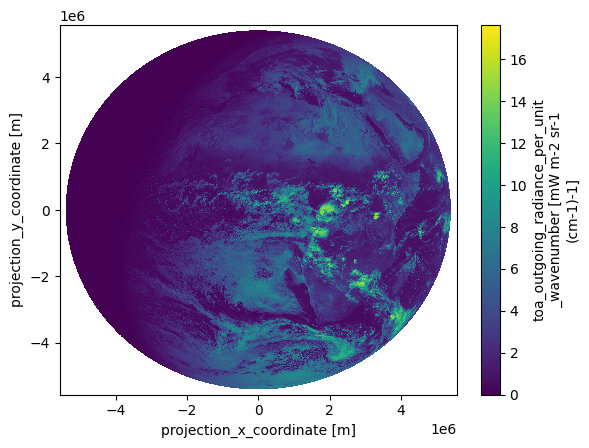

In [49]:
ds.VIS006.plot()

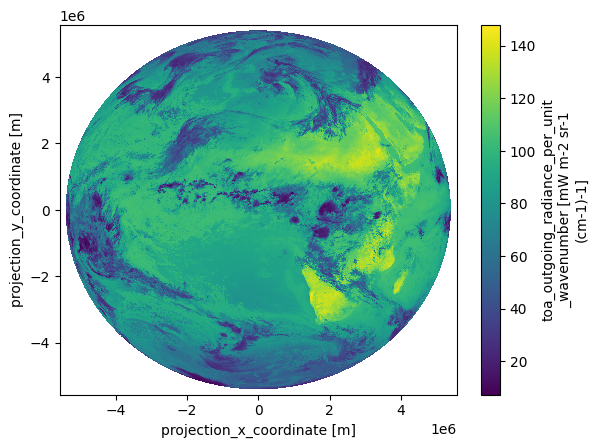

In [50]:
ds.IR_108.plot()